# **The file safety. Wav contains the signal of voice of the word safety pronounced by a male speaker, sampled at 8 kHz. The signal has a quantity significant of background noise. Develop procedures to segment the signal in portions voiced, not voiced and of silence (background noise) using measures of RMS of short term, count of crossings or ZCR. In sequence, in other code, aplique modelagem autoregressiva the each segmento. Compare the signal modelado.**

In [ ]:
!git clone https://github.com/ricagodoy/BioSignalAndImgProcessing.git

Cloning into 'BioSignalAndImgProcessing'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 909.41 KiB | 4.41 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
cd BioSignalAndImgProcessing/

/content/BioSignalAndImgProcessing


In [ ]:
!sudo apt-get update
!sudo apt-get install libportaudio2
!pip install sounddevice


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,784 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
import sounddevice as sd
sd.default.device = 'default'  # Uses the dispositivo pattern virtual of the Colab

# **Funcionamento:** ### **Segmentation:** Uses janelas of 30ms with 50% of overlap Classifica baseado in limiares of RMS and ZCR Values típicos: * Silêncio: RMS < 0.02 * Vozeado: ZCR < 0.15 and RMS alto * Not-voiceeado: ZCR > 0.15 ### **Modelagem Air:** Uses method of Yule-Walker for estimair coefficients Ordem of the modelo: * 14 for segmentos voiceeados * 8 for not-voiceeados Generates signal sintético with excitação aleatória ### **comparison:** Plotagem withpairativa Cálculo of SNR Reprodução of the signals

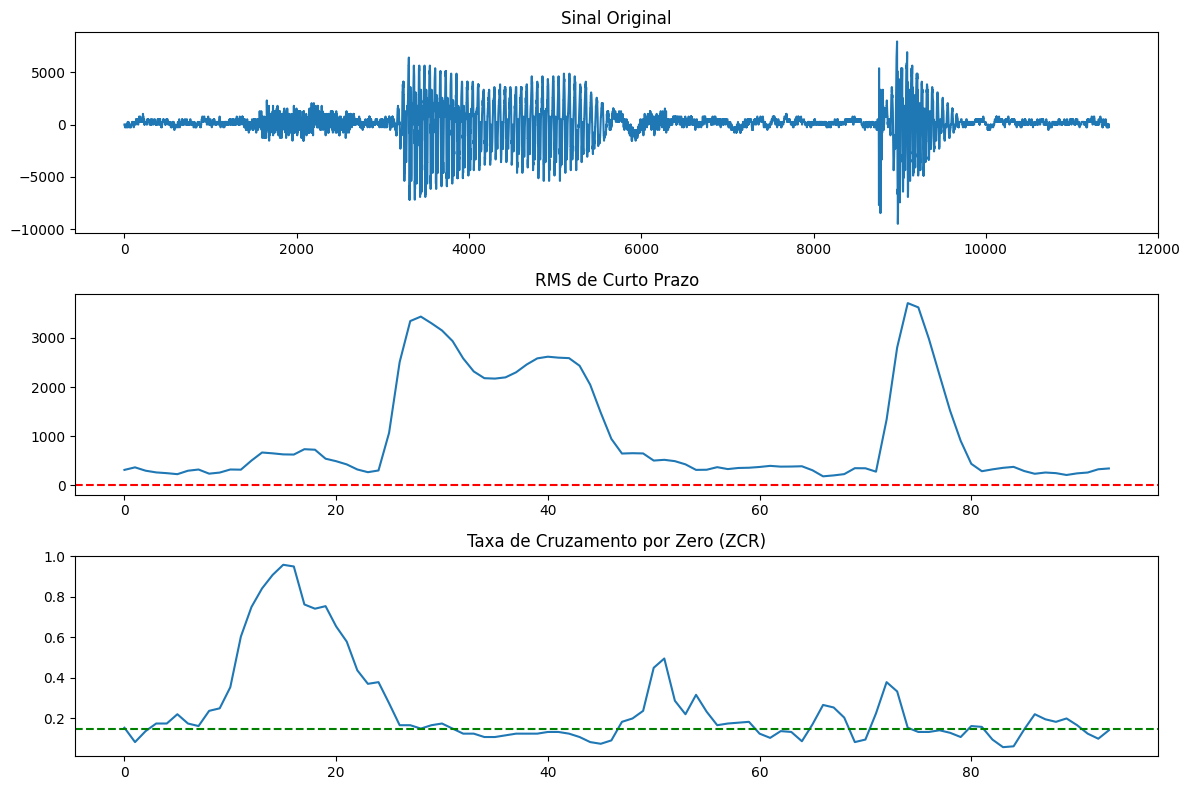

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
# import sounddevice as sd
# Parâmetrosfs = 8000
window_size = int(0.03 * fs)  # 30 msstep_size = int(window_size/2)  # 50% of sobreposiçãorms_threshold_silence = 0.02  # Ajustar conforme necessaryzcr_threshold_voiced = 0.15  # Ajustar conforme necessary
# Carrega the áudiofs, signal = wavfile.read('safety.wav')
signal = signal.astype(np.float32)

# Functions auxiliaresdef short_term_rms(signal, window_size, step):
    rms = []
    for i in range(0, len(signal)-window_size, step):
        window = signal[i:i+window_size]
        rms.append(np.sqrt(np.mean(window**2)))
    return np.array(rms)

def zero_crossing_rate(signal, window_size, step):
    zcr = []
    for i in range(0, len(signal)-window_size, step):
        window = signal[i:i+window_size]
        crossings = np.sum(np.abs(np.diff(np.sign(window))))/2
        zcr.append(crossings/(window_size/2))  # Normalizado    return np.array(zcr)

# Calculates featuresrms = short_term_rms(signal, window_size, step_size)
zcr = zero_crossing_rate(signal, window_size, step_size)

# Classification of the segmentossegments = []
for i in range(len(rms)):
    if rms[i] < rms_threshold_silence:
        segments.append('silence')
    elif zcr[i] > zcr_threshold_voiced:
        segments.append('unvoiced')
    else:
        segments.append('voiced')

# Plotagemplt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(signal)
plt.title('Sinal Original')

plt.subplot(3,1,2)
plt.plot(rms)
plt.title('RMS de Curto Prazo')
plt.axhline(rms_threshold_silence, color='r', linestyle='--')

plt.subplot(3,1,3)
plt.plot(zcr)
plt.title('Taxa de Cruzamento por Zero (ZCR)')
plt.axhline(zcr_threshold_voiced, color='g', linestyle='--')

plt.tight_layout()
plt.show()

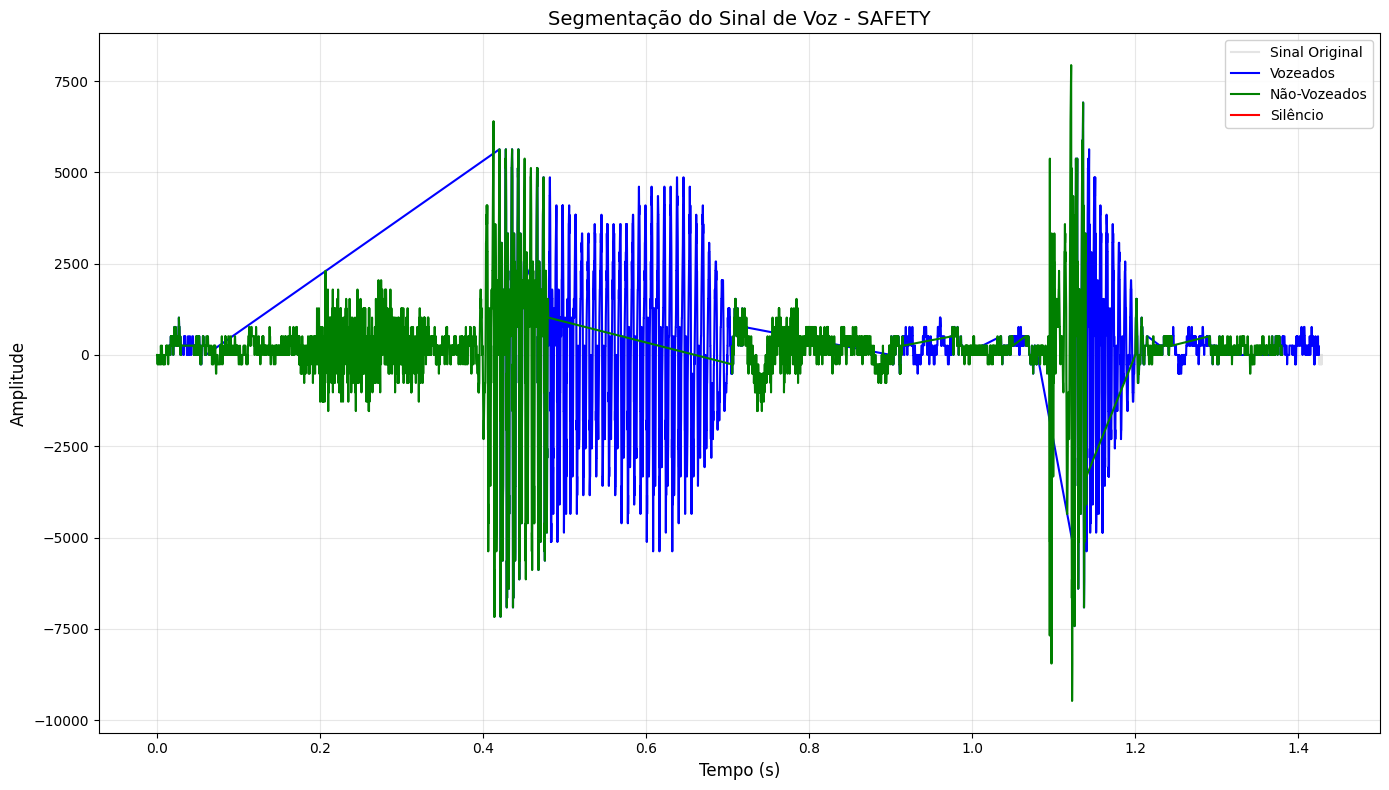

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Parâmetrosfs = 8000
window_size = int(0.03 * fs)  # 30 msstep_size = int(window_size/2)  # 50% of sobreposiçãorms_threshold_silence = 0.02
zcr_threshold_voiced = 0.15

# Carrega the áudiofs, signal = wavfile.read('safety.wav')
signal = signal.astype(np.float32)

# Functions auxiliaresdef short_term_rms(signal, window_size, step):
    rms = []
    for i in range(0, len(signal)-window_size, step):
        window = signal[i:i+window_size]
        rms.append(np.sqrt(np.mean(window**2)))
    return np.array(rms)

def zero_crossing_rate(signal, window_size, step):
    zcr = []
    for i in range(0, len(signal)-window_size, step):
        window = signal[i:i+window_size]
        crossings = np.sum(np.abs(np.diff(np.sign(window))))/2
        zcr.append(crossings/(window_size/2))
    return np.array(zcr)

# Calculates featuresrms = short_term_rms(signal, window_size, step_size)
zcr = zero_crossing_rate(signal, window_size, step_size)

# Classification of the segmentossegments = []
for i in range(len(rms)):
    if rms[i] < rms_threshold_silence:
        segments.append('silence')
    elif zcr[i] > zcr_threshold_voiced:
        segments.append('unvoiced')
    else:
        segments.append('voiced')

# Creates máscaras for each classtempo = np.arange(len(signal))/fs  # Eixo temporal correto
voiced_mask = np.zeros(len(signal), dtype=bool)
unvoiced_mask = np.zeros(len(signal), dtype=bool)
silence_mask = np.zeros(len(signal), dtype=bool)

for i, seg_type in enumerate(segments):
    start = i * step_size
    end = start + window_size
    end = min(end, len(signal))  # Previne overflow
    if seg_type == 'voiced':
        voiced_mask[start:end] = True
    elif seg_type == 'unvoiced':
        unvoiced_mask[start:end] = True
    else:
        silence_mask[start:end] = True

# Plotagem detalhadaplt.figure(figsize=(14, 8))

# Sinal original completoplt.plot(tempo, signal, color='lightgrey', alpha=0.6, label='Sinal Original')

# Segmentos voiceeadosplt.plot(tempo[voiced_mask], signal[voiced_mask],
        color='blue', linewidth=1.5, label='Vozeados')

# Segmentos not-voiceeadosplt.plot(tempo[unvoiced_mask], signal[unvoiced_mask],
        color='green', linewidth=1.5, label='Não-Vozeados')

# Segmentos of silenceplt.plot(tempo[silence_mask], signal[silence_mask],
        color='red', linewidth=1.5, label='Silêncio')

plt.axis('tight')
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Segmentação do Sinal de Voz - SAFETY', fontsize=14)
plt.legend(loc='upper right', framealpha=0.9)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

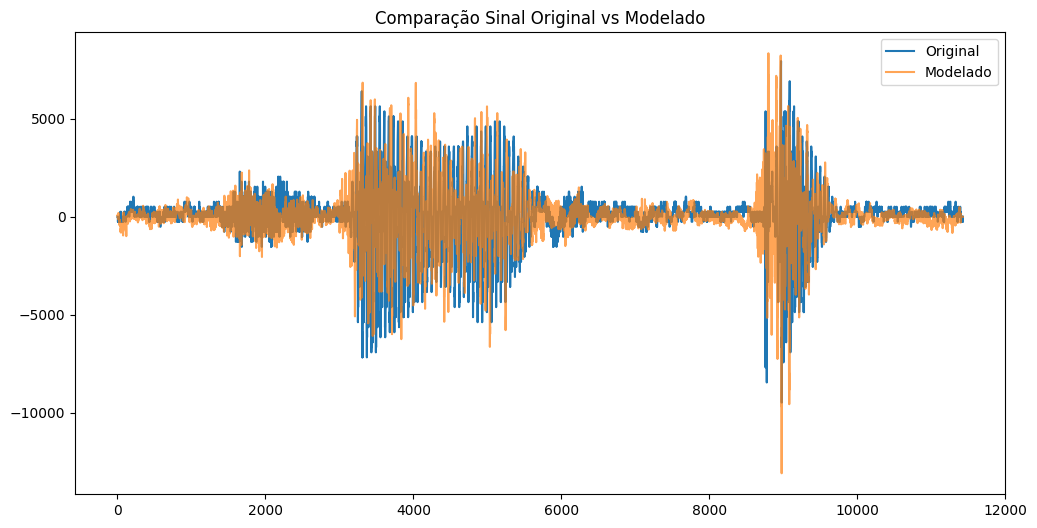

SNR: -2.75 dB


In [ ]:
from scipy.signal import lfilter
from scipy.linalg import toeplitz

# Function for modelagem Air (Method of Yule-Walker)def ar_model(signal, order=12):
    r = np.correlate(signal, signal, mode='full')[-len(signal):]
    R = toeplitz(r[:-1])
    a = np.linalg.lstsq(R, -r[1:], rcond=None)[0]
    return np.concatenate(([1.0], a))

# Processa cada segmentomodeled_signal = np.zeros_like(signal)
current_pos = 0

for i, seg_type in enumerate(segments):
    start = i * step_size
    end = start + window_size
    segment = signal[start:end]

    if len(segment) < 10:  # Ignora segmentos muito curtos        continue

    if seg_type == 'silence':
        modeled_signal[start:end] = 0
    else:
        # Ajusta ordem do modelo conforme o tipo        order = 14 if seg_type == 'voiced' else 8
        a = ar_model(segment, order)
        excitation = np.random.randn(len(segment))  # Excitação aleatória        synthetic = lfilter([1], a, excitation)
        modeled_signal[start:end] = synthetic * np.std(segment)/np.std(synthetic)

# comparisonplt.figure(figsize=(12, 6))
plt.plot(signal, label='Original')
plt.plot(modeled_signal, label='Modelado', alpha=0.7)
plt.legend()
plt.title('Comparação Sinal Original vs Modelado')
plt.show()

# Calcula SNRsnr = 10*np.log10(np.var(signal)/np.var(signal - modeled_signal))
print(f'SNR: {snr:.2f} dB')



In [ ]:
from IPython.display import Audio

# Para reproduzir o sinal originalAudio(signal, rate=fs)



In [ ]:
# Para reproduzir o sinal modeladoAudio(modeled_signal, rate=fs)

## **Ajustes Rewithendados:** Experimentair different ordens of the modelo Air Ajustair limiares of classification

## **Exercise 2** The files **pec1. Dat**, **pec33. Dat** and **pec52. Dat** contêm gravações of three canais of the signals of **PCG (fonocairdiograma)**, **ECG (eletrocairdiograma)** and **pulso cairotídeo** (amostrados the 1.000 Hz). The signals in the files **pec1. Dat** and **pec52. Dat** are normore; the signal of **PCG** in **pec33. Dat** apresenta **sopro sistólico** and is of a paciente with suspeita of **estenose pulmonair**, **defeito of the septo ventriculair** and **hipertensão pulmonair**. **Segmente each signal in their pairts sistólica and diastólica. Aplique the procedimento of modelagem Air (autoregressiva) the each segmento.**

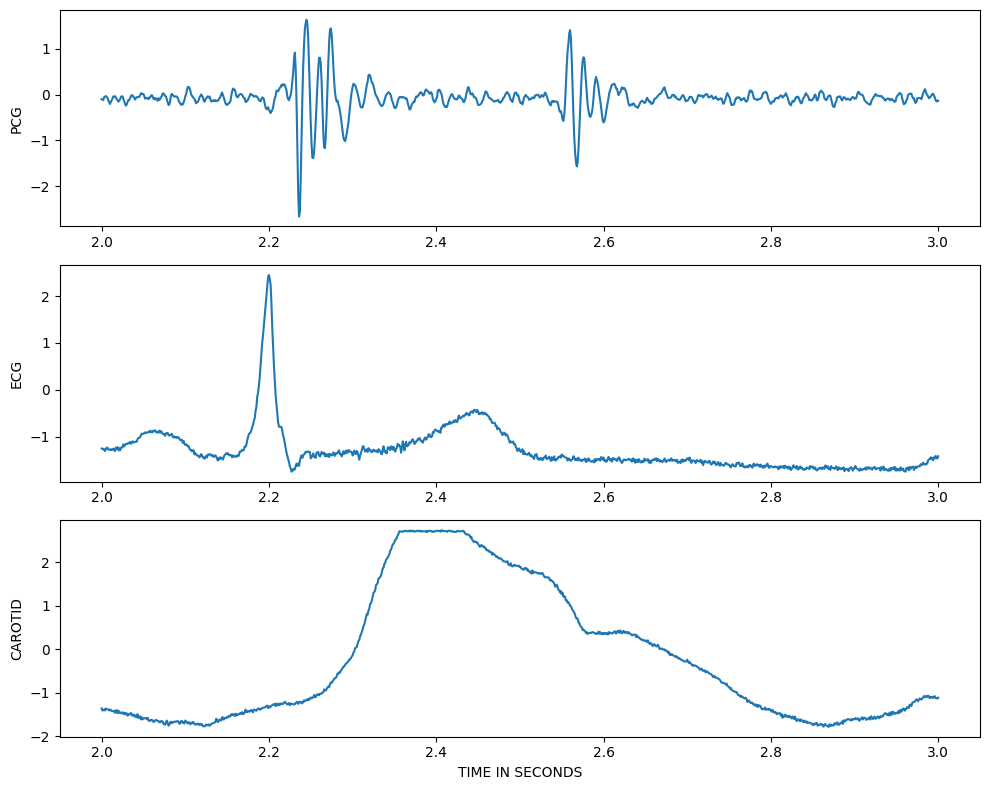

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotpec(pecfn, st, ed):
    """
    Plota os sinais PCG, ECG e CAROTID a partir de um arquivo de dados.

    Parâmetros:
        pecfn : str
            Nome do arquivo de dados (ex: 'pec1.dat').
            Os dados devem estar organizados com cada linha contendo os valores em
            [PCG, ECG, CAROTID].
        st : int
            Amostra inicial (using indexação 1).
        ed : int
            Amostra final (inclusiva, using indexação 1).

    Exemplo:
        plotpec('pec1.dat', 2000, 3000)
    """
    # Carrega os dados do arquivo    pec = np.loadtxt(pecfn)

    # Ajusta the índices of MATLAB (1-indexado) for Python (0-indexado)    pcg = pec[st-1:ed, 0]
    ecg = pec[st-1:ed, 1]
    car = pec[st-1:ed, 2]

    # Creates the vector tempo. As the rate of sampling is 1000 Hz, each sample corresponde the 1 ms.    # np.arange(st, ed+1) gera amostras de st a ed (inclusive).    t = np.arange(st, ed+1) / 1000.0

    # Cria os subplots para cada sinal    plt.figure(figsize=(10, 8))

    plt.subplot(311)
    plt.plot(t, pcg)
    plt.ylabel('PCG')

    plt.subplot(312)
    plt.plot(t, ecg)
    plt.ylabel('ECG')

    plt.subplot(313)
    plt.plot(t, car)
    plt.ylabel('CAROTID')
    plt.xlabel('TIME IN SECONDS')

    plt.tight_layout()
    plt.show()

# Exemplo de uso:plotpec('pec1.dat', 2000, 3000)
